In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df= pd.read_csv("D:/Data_Analytics/UT_DataAnalytics/Course 2_ Data Science With Python/Cleanup1.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29996,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29997,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [2]:
### Which groups are the most successful at paying there bills and why?
df['default_next_month']= le.fit_transform(df['default_next_month'])
df["default"]=df['default_next_month']

In [3]:
df=df.drop("default_next_month",1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,1
29996,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,1
29997,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,0
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,0


In [54]:
df.default.mean()

0.7788

In [61]:
df.LIMIT_BAL.mean()

167484.32266666667

### Percent of People Paying there Loans from each demographic

In [4]:
df.groupby("SEX").default.mean()

SEX
female    0.792237
male      0.758328
Name: default, dtype: float64

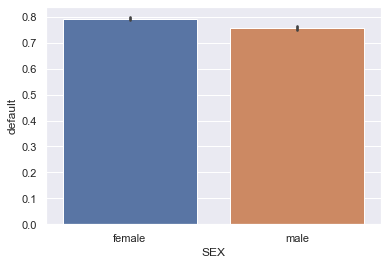

In [5]:
fg = sns.barplot(x='SEX',y= "default", data=df)


In [6]:
df.groupby("EDUCATION").default.mean()

EDUCATION
graduate school    0.807652
high school        0.748424
other              0.929487
university         0.762651
Name: default, dtype: float64

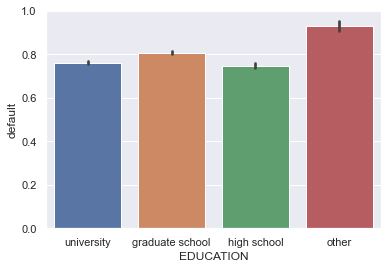

In [7]:
fg = sns.barplot(x='EDUCATION',y= "default", data=df)

In [8]:
df.groupby("MARRIAGE").default.mean()

MARRIAGE
0    0.907407
1    0.765283
2    0.790717
3    0.739938
Name: default, dtype: float64

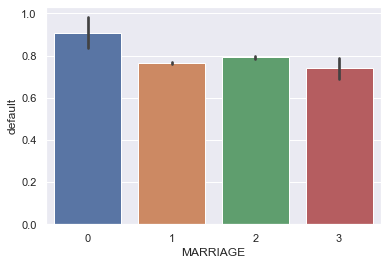

In [9]:
fg = sns.barplot(x='MARRIAGE',y= "default", data=df)

### Number of Loans being Given to Each Demographic

In [10]:
df.groupby("SEX").ID.count()

SEX
female    18112
male      11888
Name: ID, dtype: int64

C:\Users\dspla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'FacetGrid' object has no attribute 'plot'

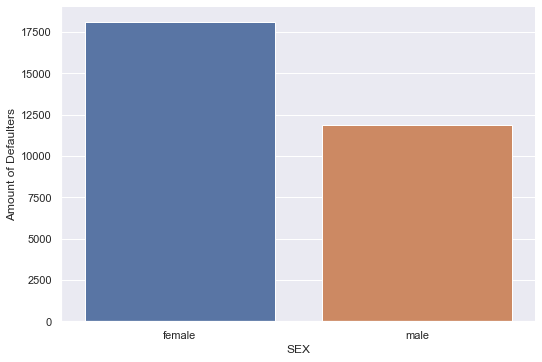

In [11]:
fg = sns.catplot('SEX', data=df, kind='count', aspect=1.5)
fg.set_ylabels('Amount of Defaulters')
fg.plot()

In [12]:
df.groupby("EDUCATION").ID.count()

EDUCATION
graduate school    10585
high school         4917
other                468
university         14030
Name: ID, dtype: int64

C:\Users\dspla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'FacetGrid' object has no attribute 'plot'

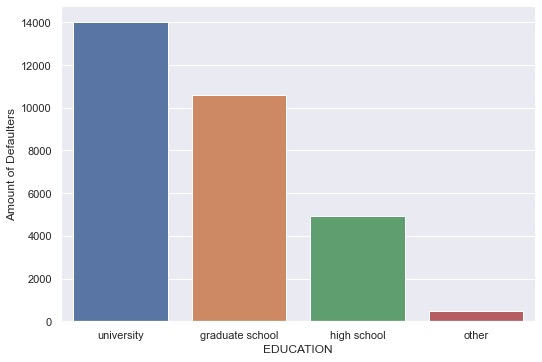

In [13]:
fg = sns.catplot('EDUCATION', data=df, kind='count', aspect=1.5)
fg.set_ylabels('Amount of Defaulters')
fg.plot()

In [52]:
df.groupby("MARRIAGE").ID.count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64

C:\Users\dspla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'FacetGrid' object has no attribute 'plot'

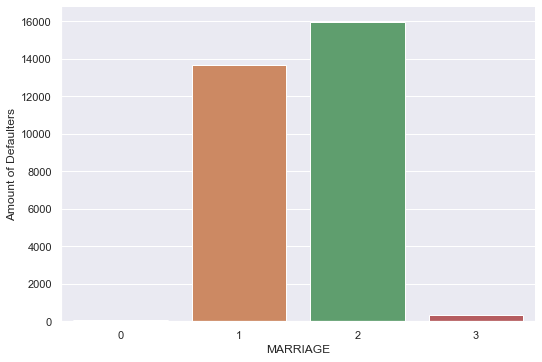

In [53]:
fg = sns.catplot('MARRIAGE', data=df, kind='count', aspect=1.5)
fg.set_ylabels('Amount of Defaulters')
fg.plot()

### Amount of Loan by Demographic (TOTALS)

In [14]:
df.groupby("SEX").LIMIT_BAL.sum()

SEX
female    3080606000
male      1943923680
Name: LIMIT_BAL, dtype: int64

Text(0, 0.5, 'LimitBal')

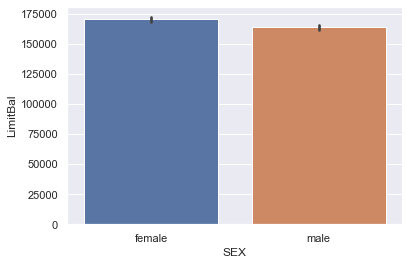

In [15]:
fg = sns.barplot(x='SEX', y="LIMIT_BAL" , data=df)
fg.set_ylabel('LimitBal')


In [16]:
df.groupby("EDUCATION").LIMIT_BAL.sum()

EDUCATION
graduate school    2254140000
high school         622247680
other                84856000
university         2063286000
Name: LIMIT_BAL, dtype: int64

Text(0, 0.5, 'LimitBal')

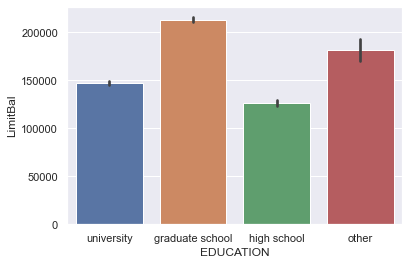

In [17]:
fg = sns.barplot(x='EDUCATION', y="LIMIT_BAL" , data=df)
fg.set_ylabel('LimitBal')

In [18]:
df.groupby("MARRIAGE").LIMIT_BAL.sum()

MARRIAGE
0       7180000
1    2488682000
2    2496987680
3      31680000
Name: LIMIT_BAL, dtype: int64

Text(0, 0.5, 'LimitBal')

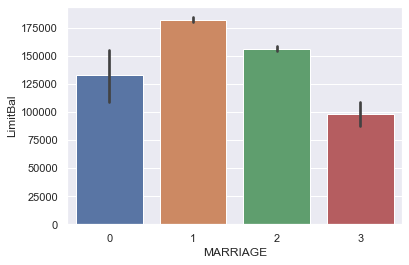

In [19]:
fg = sns.barplot(x='MARRIAGE', y="LIMIT_BAL" , data=df)
fg.set_ylabel('LimitBal')

### Amount of Loan by Demographic (Average)

In [20]:
df.groupby("SEX").LIMIT_BAL.mean()

SEX
female    170086.462014
male      163519.825034
Name: LIMIT_BAL, dtype: float64

In [21]:
df.groupby("EDUCATION").LIMIT_BAL.mean()

EDUCATION
graduate school    212956.069910
high school        126550.270490
other              181316.239316
university         147062.437634
Name: LIMIT_BAL, dtype: float64

In [22]:
df.groupby("MARRIAGE").LIMIT_BAL.mean()

MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

### Where and how much are we losing?

In [23]:
df['totalpayment'] = 0
df['totalpayment'] =df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"]
df["still_owe"]= df["LIMIT_BAL"]-df['totalpayment']
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,totalpayment,still_owe
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,0,689,19311
1,2,120000,female,university,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,0,5000,115000
2,3,90000,female,university,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,1,11018,78982
3,4,50000,female,university,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,1,8388,41612
4,5,50000,male,university,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,1,59049,-9049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,1,42550,177450
29996,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,1,14490,135510
29997,29998,30000,male,university,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,0,31300,-1300
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,0,147181,-67181


In [24]:
mask1=df.default==0
df_default=df.loc[mask1]
df_default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,totalpayment,still_owe
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,0,689,19311
1,2,120000,female,university,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,0,5000,115000
13,14,70000,male,university,2,30,1,2,2,0,...,36894,3200,0,3000,3000,1500,0,0,10700,59300
16,17,20000,male,graduate school,2,24,0,0,2,2,...,19104,3200,0,1500,0,1650,0,0,6350,13650
21,22,120000,female,university,1,39,-1,-1,-1,-1,...,316,316,316,0,632,316,0,0,1580,118420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,male,university,1,34,3,2,2,2,...,2500,0,0,0,0,0,0,0,0,210000
29994,29995,80000,male,university,2,34,2,2,2,2,...,81158,7000,3500,0,7000,0,4000,0,21500,58500
29997,29998,30000,male,university,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,0,31300,-1300
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,0,147181,-67181


In [60]:
### Total amount loss from defaulters by sex
loss = df_default['still_owe'].mean()
print(loss)

110140.36271850513


In [25]:
df_default.groupby("SEX").ID.count()

SEX
female    3763
male      2873
Name: ID, dtype: int64

Text(0, 0.5, 'Amount lost from Defaulters')

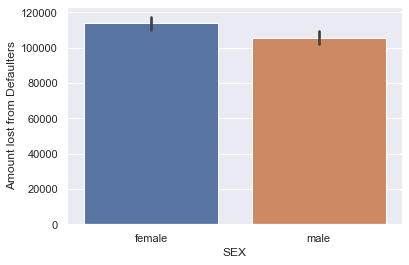

In [26]:
### Total amount loss from defaulters by sex
fg = sns.barplot(x='SEX', y="still_owe" , data=df_default)
fg.set_ylabel('Amount lost from Defaulters')


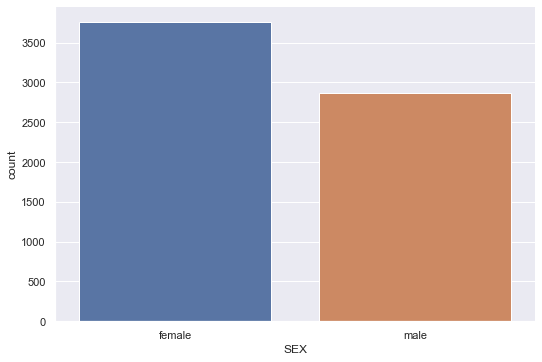

In [27]:
### Total defaulters by sex
fg = sns.catplot(x='SEX',  data=df_default, kind='count', aspect=1.5)



In [28]:
df_default.groupby("EDUCATION").ID.count()

EDUCATION
graduate school    2036
high school        1237
other                33
university         3330
Name: ID, dtype: int64

Text(0, 0.5, 'Amount lost from Defaulters')

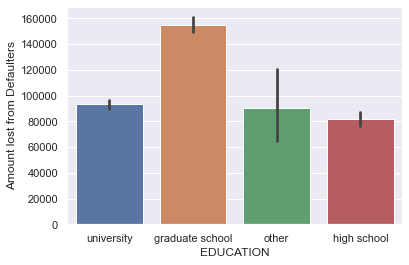

In [29]:
### Total amount loss from defaulters by education
fg = sns.barplot(x='EDUCATION', y="still_owe" , data=df_default)
fg.set_ylabel('Amount lost from Defaulters')

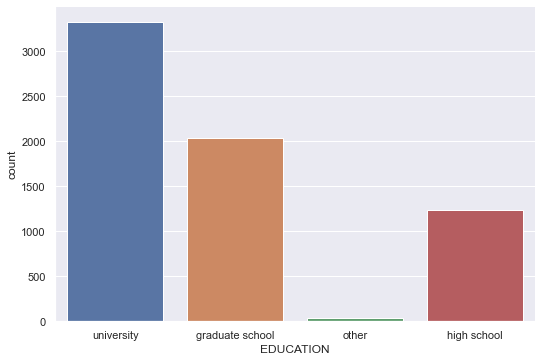

In [30]:
### Total defaulters by EDUCATION'
fg = sns.catplot(x='EDUCATION',  data=df_default, kind='count', aspect=1.5)


In [31]:
df_default.groupby("MARRIAGE").ID.count()

MARRIAGE
0       5
1    3206
2    3341
3      84
Name: ID, dtype: int64

Text(0, 0.5, 'Amount lost from Defaulters')

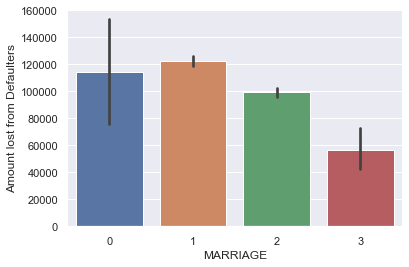

In [32]:
### Total amount loss from defaulters by MARRIAGE
fg = sns.barplot(x='MARRIAGE', y="still_owe" , data=df_default)
fg.set_ylabel('Amount lost from Defaulters')

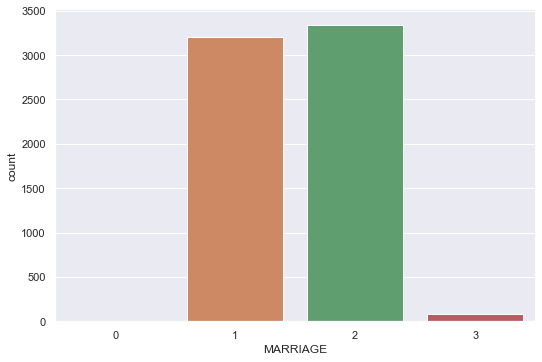

In [33]:
### Total defaulters by MARRIAGE
fg = sns.catplot(x='MARRIAGE',  data=df_default, kind='count', aspect=1.5)


### EDA Plots

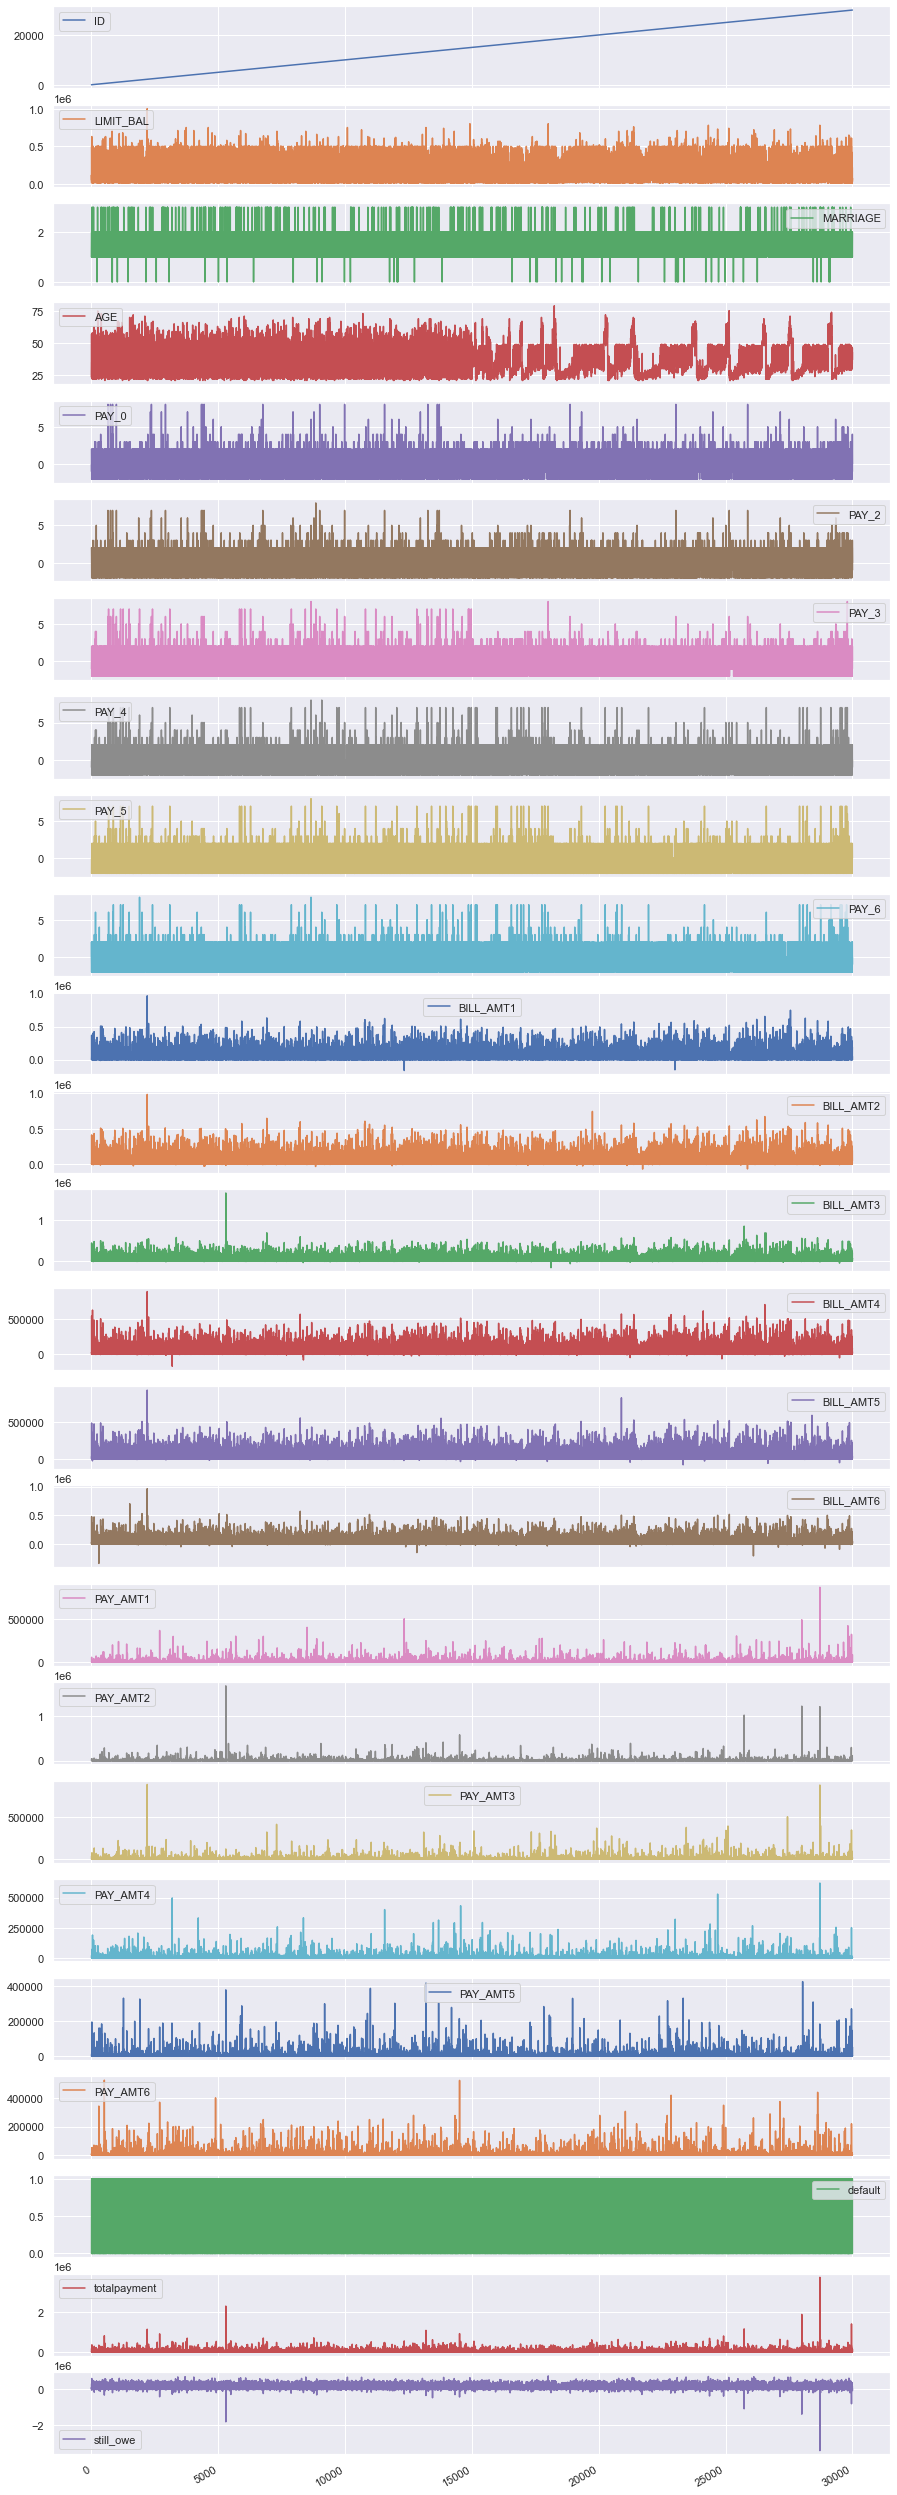

In [34]:
df.plot(subplots=True, figsize = (15,50))
plt.show()

#### Histograms

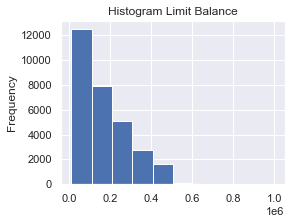

In [35]:
### Limit Balance
df.LIMIT_BAL.plot(kind = "hist" , figsize = (4,3))
plt.title("Histogram Limit Balance")
plt.show()

In [36]:
df.LIMIT_BAL.value_counts(bins=10)

(9009.999, 109000.0]     12498
(109000.0, 208000.0]      7880
(208000.0, 307000.0]      5059
(307000.0, 406000.0]      2759
(406000.0, 505000.0]      1598
(505000.0, 604000.0]       127
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(901000.0, 1000000.0]        1
(802000.0, 901000.0]         0
Name: LIMIT_BAL, dtype: int64

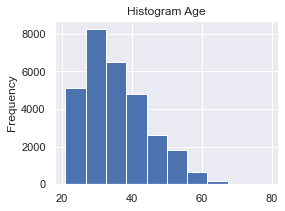

In [37]:
df.AGE.plot(kind = "hist" ,subplots=True, figsize = (4,3))
plt.title("Histogram Age")
plt.show()

In [38]:
df.var()

ID              7.500250e+07
LIMIT_BAL       1.683446e+10
MARRIAGE        2.724523e-01
AGE             8.496976e+01
PAY_0           1.262930e+00
PAY_2           1.433254e+00
PAY_3           1.432492e+00
PAY_4           1.366885e+00
PAY_5           1.284114e+00
PAY_6           1.322472e+00
BILL_AMT1       5.422240e+09
BILL_AMT2       5.065705e+09
BILL_AMT3       4.809338e+09
BILL_AMT4       4.138716e+09
BILL_AMT5       3.696294e+09
BILL_AMT6       3.546692e+09
PAY_AMT1        2.743423e+08
PAY_AMT2        5.308817e+08
PAY_AMT3        3.100051e+08
PAY_AMT4        2.454286e+08
PAY_AMT5        2.334266e+08
PAY_AMT6        3.160383e+08
default         1.722763e-01
totalpayment    3.700006e+09
still_owe       1.496798e+10
dtype: float64

In [39]:
df.corr()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,totalpayment,still_owe
ID,1.000000,0.026179,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,...,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,0.013952,0.020217,0.017712
LIMIT_BAL,0.026179,1.000000,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,...,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,0.153520,0.352655,0.885182
MARRIAGE,-0.029079,-0.108139,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,...,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,0.024339,-0.011222,-0.109104
AGE,0.018678,0.144713,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,...,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.013890,0.040776,0.133197
PAY_0,-0.030575,-0.271214,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,...,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,-0.324794,-0.116810,-0.229551
PAY_2,-0.011215,-0.296382,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,...,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,-0.263551,-0.092553,-0.268302
PAY_3,-0.018494,-0.286123,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,...,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,-0.235253,-0.071732,-0.267774
PAY_4,-0.002735,-0.267460,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,...,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,-0.216614,-0.050720,-0.258429
PAY_5,-0.022199,-0.249411,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,...,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,-0.204149,-0.030362,-0.249410
PAY_6,-0.020270,-0.235195,0.034345,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,...,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,-0.186866,-0.014856,-0.242043


In [40]:
df.cov()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,totalpayment,still_owe
ID,7.500250e+07,2.941664e+07,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,-217.860029,-201.877379,...,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,50.151705,1.065016e+07,1.876648e+07
LIMIT_BAL,2.941664e+07,1.683446e+10,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441,...,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,8267.551759,2.783241e+09,1.405121e+10
MARRIAGE,-1.314525e+02,-7.323670e+03,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,0.021074,0.020616,...,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,0.005273,-3.563149e+02,-6.967355e+03
AGE,1.491057e+03,1.730767e+05,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,-0.562245,-0.517022,...,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,-0.053143,2.286301e+04,1.502137e+05
PAY_0,-2.975726e+02,-3.954593e+04,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292,...,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,-0.151499,-7.984951e+03,-3.156098e+04
PAY_2,-1.162770e+02,-4.603765e+04,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320,...,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,-0.130960,-6.739912e+03,-3.929774e+04
PAY_3,-1.916922e+02,-4.443225e+04,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815,...,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,-0.116867,-5.222297e+03,-3.920996e+04
PAY_4,-2.769132e+01,-4.057181e+04,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263,...,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,-0.105115,-3.607024e+03,-3.696479e+04
PAY_5,-2.178600e+02,-3.667056e+04,0.021074,-0.562245,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545,...,1.771569e+04,-1.142817e+02,-8.332449e+01,1.808121e+02,-1.034962e+03,-5.771610e+02,-4.638926e+02,-0.096020,-2.092810e+03,-3.457775e+04
PAY_6,-2.018774e+02,-3.509308e+04,0.020616,-0.517022,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472,...,1.952488e+04,-2.850067e+01,-1.383995e+02,1.181210e+02,3.426237e+02,-8.158327e+02,-5.172163e+02,-0.089194,-1.039204e+03,-3.405388e+04


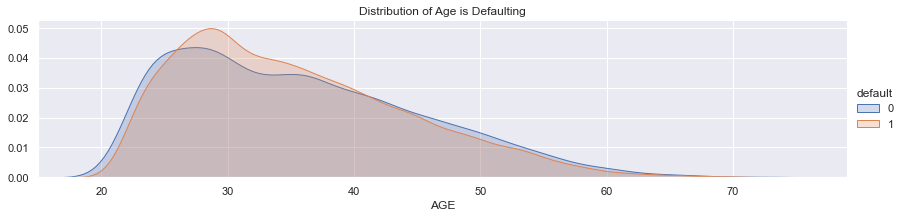

In [41]:
fig = sns.FacetGrid(df, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(15,oldest))
fig.set(title='Distribution of Age is Defaulting')
fig.add_legend()

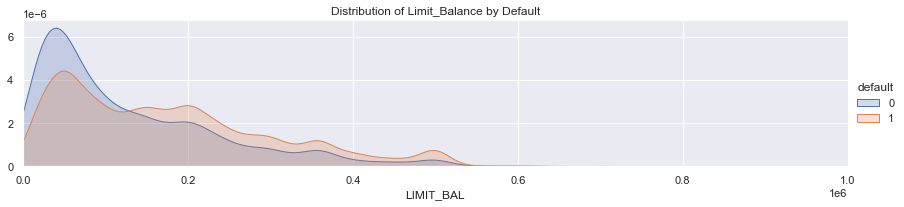

In [42]:
## Looks like people who get smaller loans tend to default more

fig = sns.FacetGrid(df, hue='default', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Limit_Balance by Default')
fig.add_legend()

C:\Users\dspla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


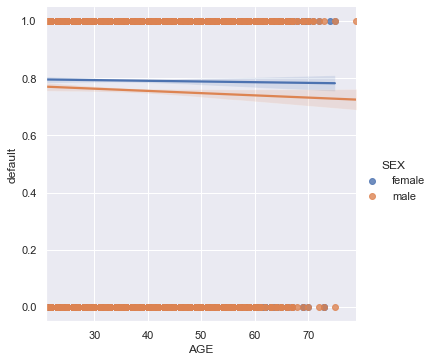

In [43]:
#   0=DEFAULT      1=NOTDEFAULT
sns.lmplot('AGE', 'default', data=df, hue="SEX")

C:\Users\dspla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


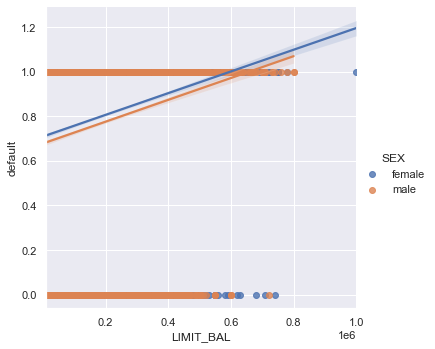

In [44]:
#   0=DEFAULT      1=NOTDEFAULT
sns.lmplot('LIMIT_BAL', 'default', data=df, hue="SEX")

In [45]:
df.groupby("SEX").agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                                    AGE   default
                 mean         sum    min      max       mean      mean
SEX                                                                   
female  170086.462014  3080606000  10000  1000000  34.806868  0.792237
male    163519.825034  1943923680  10000   800000  36.519431  0.758328

In [46]:
df.groupby("EDUCATION").agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                                    AGE  \
                          mean         sum    min      max       mean   
EDUCATION                                                               
graduate school  212956.069910  2254140000  10000  1000000  34.231838   
high school      126550.270490   622247680  10000   760000  40.299980   
other            181316.239316    84856000  10000   710000  36.143162   
university       147062.437634  2063286000  10000   800000  34.722096   

                  default  
                     mean  
EDUCATION                  
graduate school  0.807652  
high school      0.748424  
other            0.929487  
university       0.762651

In [47]:
df.groupby("MARRIAGE").agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                                    AGE   default
                   mean         sum    min      max       mean      mean
MARRIAGE                                                                
0         132962.962963     7180000  10000   360000  37.814815  0.907407
1         182200.893184  2488682000  10000  1000000  40.016692  0.765283
2         156413.660737  2496987680  10000   800000  31.452706  0.790717
3          98080.495356    31680000  10000   500000  42.798762  0.739938

In [48]:
df.groupby(["SEX","EDUCATION"]).agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                                    AGE  \
                                 mean         sum    min      max       mean   
SEX    EDUCATION                                                               
female graduate school  208557.213930  1299520000  10000  1000000  33.027925   
       high school      130362.145542   381570000  10000   750000  40.275026   
       other            187315.436242    55820000  10000   710000  35.694631   
       university       155232.902033  1343696000  10000   780000  34.207833   
male   graduate school  219251.263206   954620000  10000   800000  35.954754   
       high school      120943.557789   240677680  10000   760000  40.336683   
       other            170800.000000    29036000  10000   550000  36.929412   
       university       133902.121325   719590000  10000   800000  35.550428   

                         default  
                            mean  
SEX    EDUCATION                  
female graduate school  0.818649  
       high school      0.763580  
       other            0.936242  
       university       0.777957  
male   graduate school  0.791915  
       high school      0.726131  
       other            0.917647  
       university       0.737998

In [49]:
df.groupby(["SEX","MARRIAGE"]).agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                                    AGE  \
                          mean         sum    min      max       mean   
SEX    MARRIAGE                                                         
female 0         134000.000000     5360000  20000   300000  37.775000   
       1         176772.464281  1497086000  10000  1000000  38.899870   
       2         165620.019127  1558650000  10000   780000  30.956646   
       3         101614.583333    19510000  10000   470000  42.369792   
male   0         130000.000000     1820000  10000   360000  37.928571   
       1         191058.959538   991596000  10000   800000  41.839114   
       2         143192.076911   938337680  10000   800000  32.165115   
       3          92900.763359    12170000  10000   500000  43.427481   

                  default  
                     mean  
SEX    MARRIAGE            
female 0         0.925000  
       1         0.780375  
       2         0.802784  
       3         0.770833  
male   0         0.857143  
       1         0.740655  
       2         0.773386  
       3         0.694656

In [50]:
df.groupby(["EDUCATION","MARRIAGE"]).agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                              \
                                   mean         sum    min      max   
EDUCATION       MARRIAGE                                              
graduate school 0         195000.000000      780000  50000   300000   
                1         253113.917249   942090000  10000  1000000   
                2         191310.030842  1302630000  10000   800000   
                3         172800.000000     8640000  10000   500000   
high school     0         118409.090909     5210000  10000   300000   
                1         133327.507864   381450000  10000   760000   
                2         119364.944997   227867680  10000   690000   
                3          74951.456311     7720000  10000   500000   
other           1         199769.230769    46746000  10000   550000   
                2         162831.858407    36800000  10000   710000   
                3         163750.000000     1310000  20000   320000   
university      0         198333.333333     1190000  50000   360000   
                1         163460.391698  1118396000  10000   800000   
                2         132434.472934   929690000  10000   780000   
                3          86481.481481    14010000  10000   360000   

                                AGE   default  
                               mean      mean  
EDUCATION       MARRIAGE                       
graduate school 0         36.500000  1.000000  
                1         40.483611  0.793391  
                2         30.756205  0.815832  
                3         41.980000  0.740000  
high school     0         38.159091  0.909091  
                1         43.082489  0.736456  
                2         35.837087  0.763227  
                3         46.640777  0.737864  
other           1         39.478632  0.927350  
                2         32.592920  0.929204  
                3         38.875000  1.000000  
university      0         36.166667  0.833333  
                1         38.499123  0.756504  
                2         30.899288  0.769373  
                3         40.802469  0.728395

In [51]:
df.groupby(["SEX","EDUCATION","MARRIAGE"]).agg({"LIMIT_BAL":["mean","sum","min", "max"],"AGE":["mean"],"default":["mean"]})

LIMIT_BAL                              \
                                          mean        sum     min      max   
SEX    EDUCATION       MARRIAGE                                              
female graduate school 0         160000.000000     480000   50000   220000   
                       1         245319.881890  498490000   10000  1000000   
                       2         190821.360153  796870000   10000   750000   
                       3         184000.000000    3680000   20000   450000   
       high school     0         126562.500000    4050000   20000   300000   
                       1         129387.755102  234580000   10000   750000   
                       2         135674.876847  137710000   10000   690000   
                       3          78059.701493    5230000   10000   470000   
       other           1         196052.631579   29800000   20000   510000   
                       2         178285.714286   24960000   10000   710000   
                       3         176666.666667    1060000   20000   320000   
       university      0         166000.000000     830000   50000   290000   
                       1         164180.679785  734216000   10000   750000   
                       2         146840.686275  599110000   10000   780000   
                       3          96363.636364    9540000   10000   360000   
male   graduate school 0         300000.000000     300000  300000   300000   
                       1         262485.207101  443600000   10000   780000   
                       2         192085.074060  505760000   10000   800000   
                       3         165333.333333    4960000   10000   500000   
       high school     0          96666.666667    1160000   10000   200000   
                       1         140143.129771  146870000   10000   760000   
                       2         100847.516779   90157680   10000   610000   
                       3          69166.666667    2490000   10000   500000   
       other           1         206658.536585   16946000   10000   550000   
                       2         137674.418605   11840000   10000   540000   
                       3         125000.000000     250000  100000   150000   
       university      0         360000.000000     360000  360000   360000   
                       1         162101.265823  384180000   10000   800000   
                       2         112442.176871  330580000   10000   710000   
                       3          70952.380952    4470000   10000   360000   

                                       AGE   default  
                                      mean      mean  
SEX    EDUCATION       MARRIAGE                       
female graduate school 0         36.333333  1.000000  
                       1         38.870571  0.813484  
                       2         30.158046  0.820881  
                       3         38.150000  0.850000  
       high school     0         38.218750  0.937500  
                       1         42.356315  0.751241  
                       2         36.240394  0.780296  
                       3         46.059701  0.761194  
       other           1         38.440789  0.953947  
                       2         32.528571  0.914286  
                       3         40.000000  1.000000  
       university      0         35.800000  0.800000  
                       1         37.527504  0.771243  
                       2         30.405637  0.786029  
                       3         40.868687  0.747475  
male   graduate school 0         37.000000  1.000000  
                       1         42.423077  0.769231  
                       2         31.704899  0.807824  
                       3         44.533333  0.666667  
       high school     0         38.000000  0.833333  
                       1         44.338740  0.710878  
                       2         35.379195  0.743848  
                       3         47.722222  0.694444  
       other           1        